In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward as ak

In [2]:
file = uproot.open('sim_hcal_barrel_muon.root')
file.keys(), file.classnames()

(['events;2',
  'events;1',
  'metadata;1',
  'run_metadata;1',
  'evt_metadata;1',
  'col_metadata;1'],
 {'events;2': 'TTree',
  'events;1': 'TTree',
  'metadata;1': 'TTree',
  'run_metadata;1': 'TTree',
  'evt_metadata;1': 'TTree',
  'col_metadata;1': 'TTree'})

In [3]:
tree1 = file['events;1']
tree2 = file['events;2']

for i in range(len(tree1)):
    print(tree1[i])

<TBranchElement 'mcparticles' (32 subbranches) at 0x013c70989308>
<TBranchElement 'mcparticles_0' at 0x013c709893c8>
<TBranchElement 'mcparticles_1' at 0x013c73ff9a48>
<TBranchElement 'MRICHHits' (21 subbranches) at 0x013c73ffe8c8>
<TBranchElement 'VertexBarrelHits' (21 subbranches) at 0x013c74059888>
<TBranchElement 'DIRCHits' (21 subbranches) at 0x013c740b8088>
<TBranchElement 'RWellTrackerBarrelHits' (21 subbranches) at 0x013c741143c8>
<TBranchElement 'TrackerBarrelHits' (21 subbranches) at 0x013c7416dbc8>
<TBranchElement 'TrackerEndcapHits' (21 subbranches) at 0x013c741ca408>
<TBranchElement 'EcalEndcapHits' (16 subbranches) at 0x013c740b80c8>
<TBranchElement 'CrystalEcalHits' (16 subbranches) at 0x013c7426f1c8>
<TBranchElement 'HcalBarrelHits' (16 subbranches) at 0x013c742b56c8>
<TBranchElement 'HcalEndcapHits' (16 subbranches) at 0x013c742fac88>
<TBranchElement 'EcalBarrelHits' (16 subbranches) at 0x013c74346288>
<TBranchElement 'ForwardRICHHits' (21 subbranches) at 0x013c74383d8

In [4]:
hcal = tree1['HcalBarrelHits']
hcal.keys()  

['HcalBarrelHits.cellID',
 'HcalBarrelHits.flag',
 'HcalBarrelHits.g4ID',
 'HcalBarrelHits.position.x',
 'HcalBarrelHits.position.y',
 'HcalBarrelHits.position.z',
 'HcalBarrelHits.position.t',
 'HcalBarrelHits.truth.trackID',
 'HcalBarrelHits.truth.pdgID',
 'HcalBarrelHits.truth.deposit',
 'HcalBarrelHits.truth.time',
 'HcalBarrelHits.truth.length',
 'HcalBarrelHits.truth.x',
 'HcalBarrelHits.truth.y',
 'HcalBarrelHits.truth.z',
 'HcalBarrelHits.energyDeposit']

In [5]:
hcal.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
HcalBarrelHits       | vector<dd4pod::Calorimet | AsGroup(<TBranchElement 'HcalB
HcalBarrelHits.ce... | int64_t[]                | AsJagged(AsDtype('>i8'))
HcalBarrelHits.flag  | int64_t[]                | AsJagged(AsDtype('>i8'))
HcalBarrelHits.g4ID  | int64_t[]                | AsJagged(AsDtype('>i8'))
HcalBarrelHits.po... | double[]                 | AsJagged(AsDtype('>f8'))
HcalBarrelHits.po... | double[]                 | AsJagged(AsDtype('>f8'))
HcalBarrelHits.po... | double[]                 | AsJagged(AsDtype('>f8'))
HcalBarrelHits.po... | double[]                 | AsJagged(AsDtype('>f8'))
HcalBarrelHits.tr... | int32_t[]                | AsJagged(AsDtype('>i4'))
HcalBarrelHits.tr... | int32_t[]                | AsJagged(AsDtype('>i4'))
HcalBarrelHits.tr... | double[]                 | AsJagged(AsDtype('>f8'))
HcalBar

In [6]:
xpos = ak.flatten(hcal.arrays()['HcalBarrelHits.position.x'],axis=None)  # must flatten the awkward/jagged arrays to a 1D array for histogram. 
ypos = ak.flatten(hcal.arrays()['HcalBarrelHits.position.y'],axis=None)
zpos = ak.flatten(hcal.arrays()['HcalBarrelHits.position.z'],axis=None)

truex = ak.flatten(hcal.arrays()['HcalBarrelHits.truth.x'],axis=None)
truey = ak.flatten(hcal.arrays()['HcalBarrelHits.truth.y'],axis=None)  
truez = ak.flatten(hcal.arrays()['HcalBarrelHits.truth.z'],axis=None)  

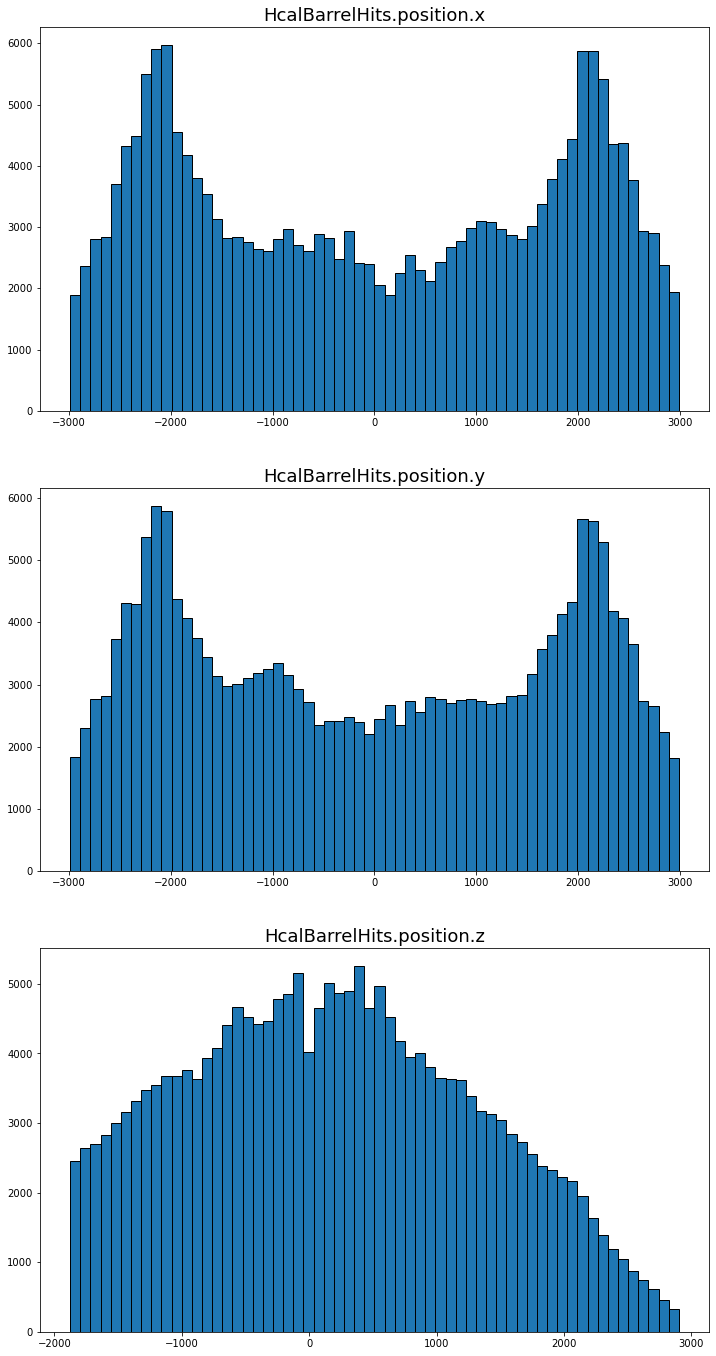

In [7]:
plt.figure(figsize=(12,24))
plt.subplot(311)
plt.hist(xpos,bins=60,histtype='bar',edgecolor='black'); # put ; or plt.show() to suppress value outputs.
plt.title("HcalBarrelHits.position.x",fontsize=18)
plt.subplot(312)
plt.hist(ypos,bins=60,histtype='bar',edgecolor='black'); 
plt.title("HcalBarrelHits.position.y",fontsize=18)
plt.subplot(313)
plt.hist(zpos,bins=60,histtype='bar',edgecolor='black'); 
plt.title("HcalBarrelHits.position.z",fontsize=18);

In [8]:
diffx = xpos - truex  # determines the level of segmentation we should use
diffy = ypos - truey
diffz = zpos - truez

print("Difference in hit x position and true position (in mm): ", diffx)
print("Difference in hit y position and true position (in mm): ", diffy)
print("Difference in hit z position and true position (in mm): ", diffz)

Difference in hit x position and true position (in mm):  [0.148, 0.832, 1.54, 2.27, -2.08, -1.51, ... -2.17, 2.13, 1.45, 0.807, 0.278, 0.776]
Difference in hit y position and true position (in mm):  [0.257, 1.44, 2.66, 3.92, -3.6, -2.62, ... -3.75, 3.69, 2.52, 1.4, 0.482, 1.34]
Difference in hit z position and true position (in mm):  [-1.99, 0.128, 2.28, 4.54, -3.33, -1.11, ... 2.28, 0.177, -2.07, -4.34, 3.15, 4.46]


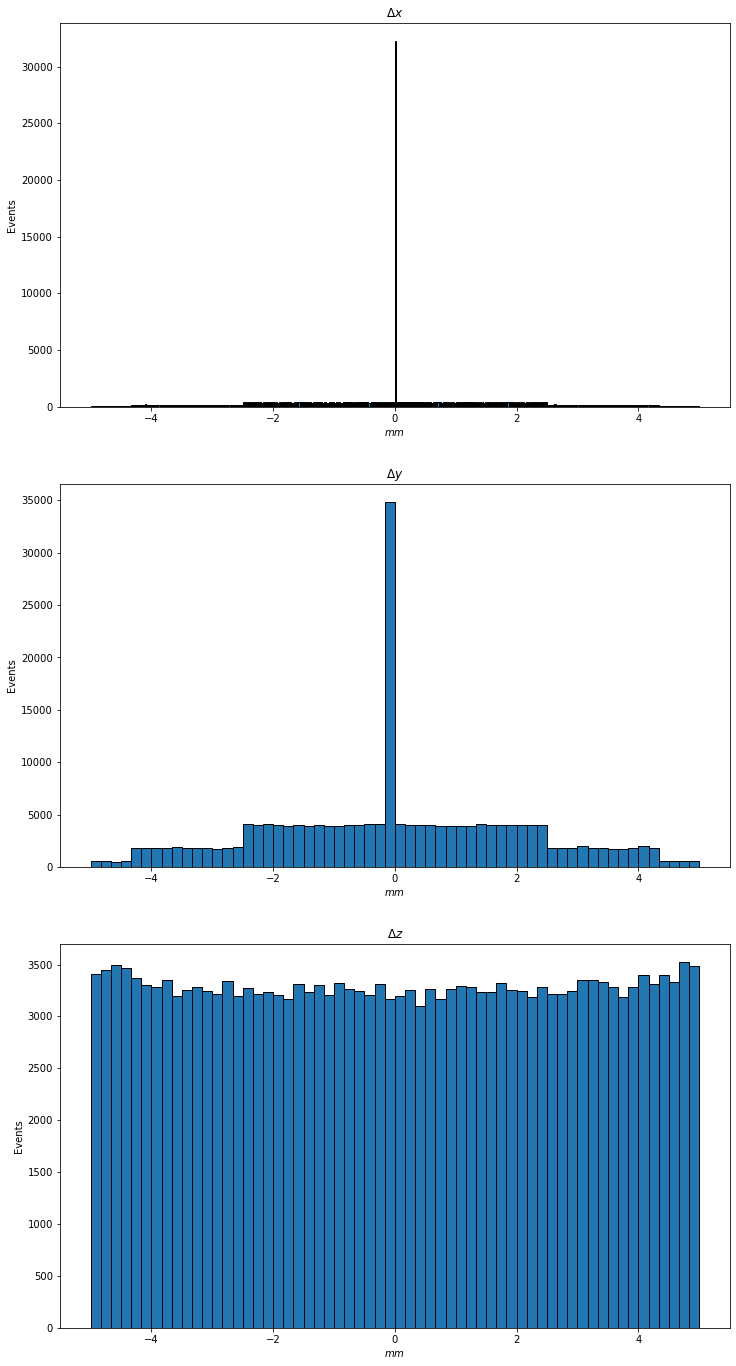

In [29]:
plt.figure(figsize=(12,24))
plt.subplot(311)
plt.hist(diffx,bins=600,histtype='bar',edgecolor='black');
plt.title("$\Delta x$")
plt.xlabel("$mm$")
plt.ylabel("Events")
plt.subplot(312)
plt.hist(diffy,bins=60,histtype='bar',edgecolor='black'); 
plt.title("$\Delta y$")
plt.xlabel("$mm$")
plt.ylabel("Events")
plt.subplot(313)
plt.hist(diffz,bins=60,histtype='bar',edgecolor='black'); 
plt.title("$\Delta z$")
plt.xlabel("$mm$")
plt.ylabel("Events");
plt.savefig("events1.png")

In [10]:
# rg1x = diffx[np.logical_and(diffx > 0, diffx < 0.18)]
# rg2x = np.concatenate((diffx[np.logical_and(diffx > -2.6, diffx < 0)],diffx[np.logical_and(diffx > 0.2, diffx < 2.6)]))
# rg3x = np.concatenate((diffx[np.logical_and(diffx > -4.4, diffx < -2.6)],diffx[np.logical_and(diffx > 2.6, diffx < 4.4)]))
# plt.hist(rg1x)
# plt.hist(rg2x)
# plt.hist(rg3x)

Text(0, 0.5, 'diffx')

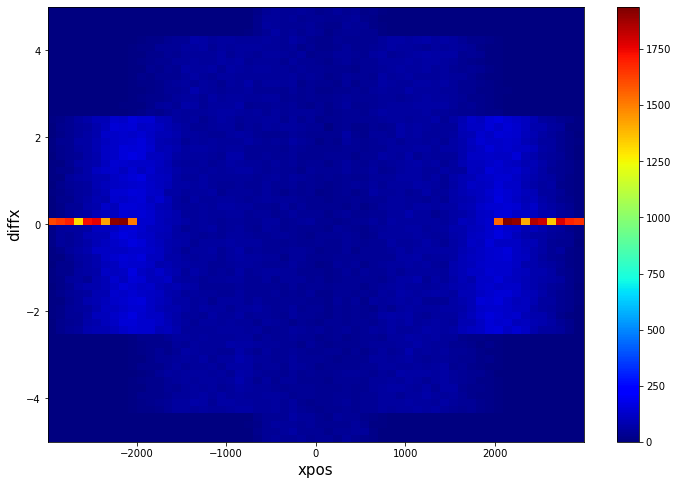

In [31]:
plt.figure(figsize=(12,8))
plt.hist2d(np.array(xpos),np.array(diffx), bins=(60, 60), cmap=plt.cm.jet);  # same bin dimensions for square bins
plt.colorbar()
plt.xlabel("xpos",fontsize=15)
plt.ylabel("diffx",fontsize=15)

Text(0, 0.5, 'diffy')

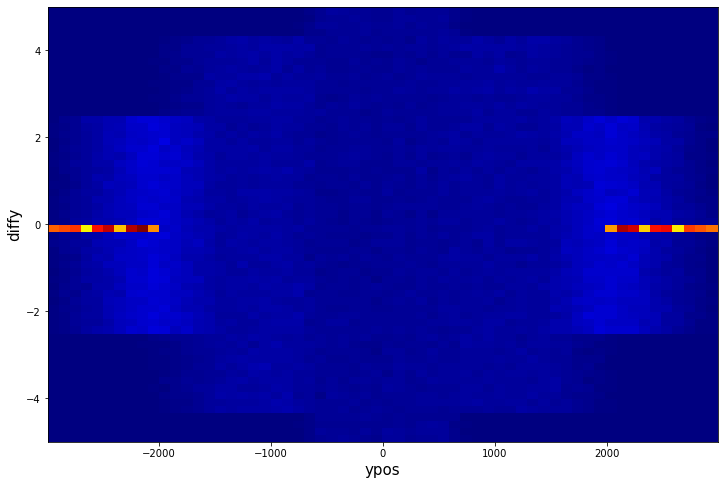

In [12]:
plt.figure(figsize=(12,8))
plt.hist2d(np.array(ypos),np.array(diffy), bins=(60, 60), cmap=plt.cm.jet);  # same bin dimensions for square bins
plt.xlabel("ypos",fontsize=15)
plt.ylabel("diffy",fontsize=15)

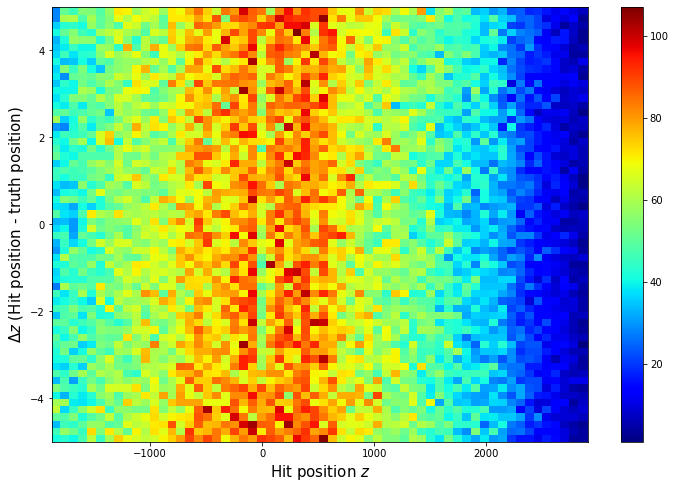

In [33]:
plt.figure(figsize=(12,8))
plt.hist2d(np.array(zpos),np.array(diffz), bins=(60, 60), cmap=plt.cm.jet);  # same bin dimensions for square bins
plt.xlabel("Hit position $z$",fontsize=15)
plt.ylabel("$\Delta z$ (Hit position - truth position)",fontsize=15)
plt.colorbar()

In [14]:
radiusHit = np.sqrt(xpos**2+ypos**2)
phiHit = np.arctan2(ypos, xpos)

trueHit = np.sqrt(truex**2+truey**2)
phiTrue = np.arctan2(truey, truex)

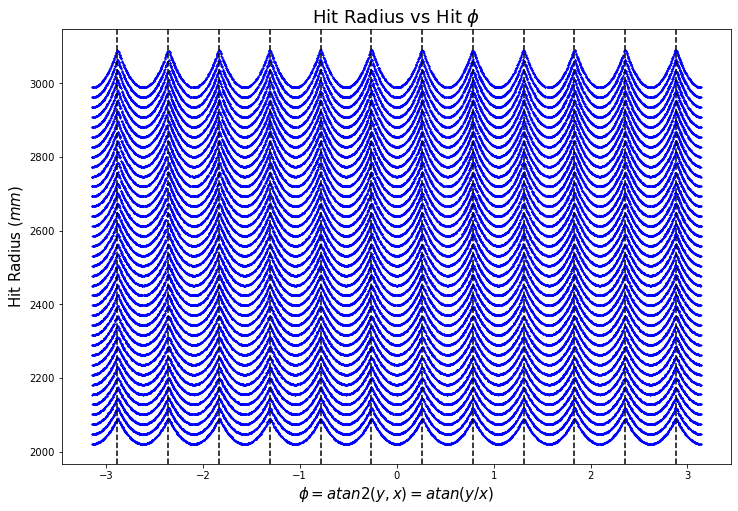

In [15]:
peaks = [-2.8829,-2.3566,-1.8328,-1.3096,-0.7852,-0.2614,0.2618,0.7838,1.3088,1.8314,2.3558,2.8803]

plt.figure(figsize=(12,8))
plt.plot(phiHit, radiusHit, "b.", markersize=1.5)
plt.xlabel("$\phi = atan2(y,x) = atan(y/x)$",fontsize=15)
plt.ylabel("Hit Radius ($mm$)", fontsize=15)
plt.title("Hit Radius vs Hit $\phi$",fontsize=18)

for i in range(len(peaks)):
    plt.axvline(x=peaks[i],color="k",linestyle="--")

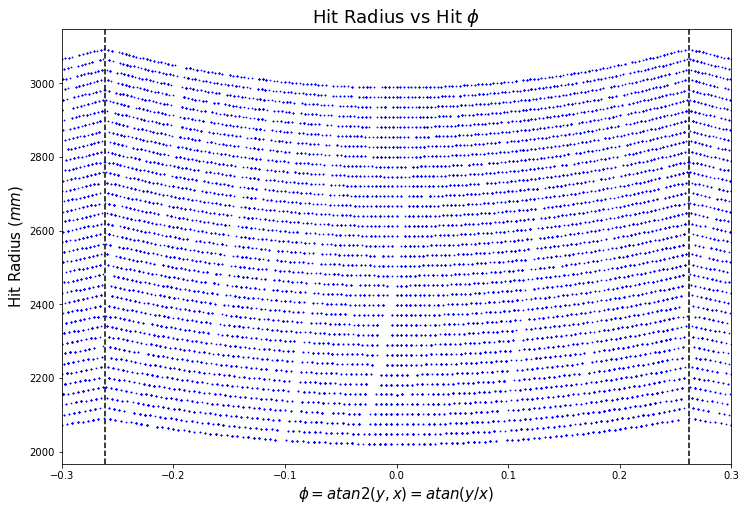

In [16]:
peaks = [-2.8829,-2.3566,-1.8328,-1.3096,-0.7852,-0.2614,0.2618,0.7838,1.3088,1.8314,2.3558,2.8803]

plt.figure(figsize=(12,8))
plt.plot(phiHit, radiusHit, "b.", markersize=1.5)
plt.xlabel("$\phi = atan2(y,x) = atan(y/x)$",fontsize=15)
plt.ylabel("Hit Radius ($mm$)", fontsize=15)
plt.title("Hit Radius vs Hit $\phi$",fontsize=18)
plt.xlim(-0.3,0.3)

for i in range(len(peaks)):
    plt.axvline(x=peaks[i],color="k",linestyle="--")

Regarding the plot above: there are ~20 layers in the calorimeters, so we end up seeing those layers. The wavy pattern is because the staves (side of barrel) are flat, so that means the radius at the point where two staves touch is larger than at the center of a stave; The peaks correspond to where one stave touches the next one.

Most of our units will be: mm, GeV, ns, rad.

In [17]:
hcal2 = tree2['HcalBarrelHits']
xpos2 = ak.flatten(hcal2.arrays()['HcalBarrelHits.position.x'],axis=None)  # must flatten the awkward/jagged arrays to a 1D array for histogram. 
ypos2 = ak.flatten(hcal2.arrays()['HcalBarrelHits.position.y'],axis=None)
zpos2 = ak.flatten(hcal2.arrays()['HcalBarrelHits.position.z'],axis=None)

truex2 = ak.flatten(hcal2.arrays()['HcalBarrelHits.truth.x'],axis=None)
truey2 = ak.flatten(hcal2.arrays()['HcalBarrelHits.truth.y'],axis=None)  
truez2 = ak.flatten(hcal2.arrays()['HcalBarrelHits.truth.z'],axis=None)  

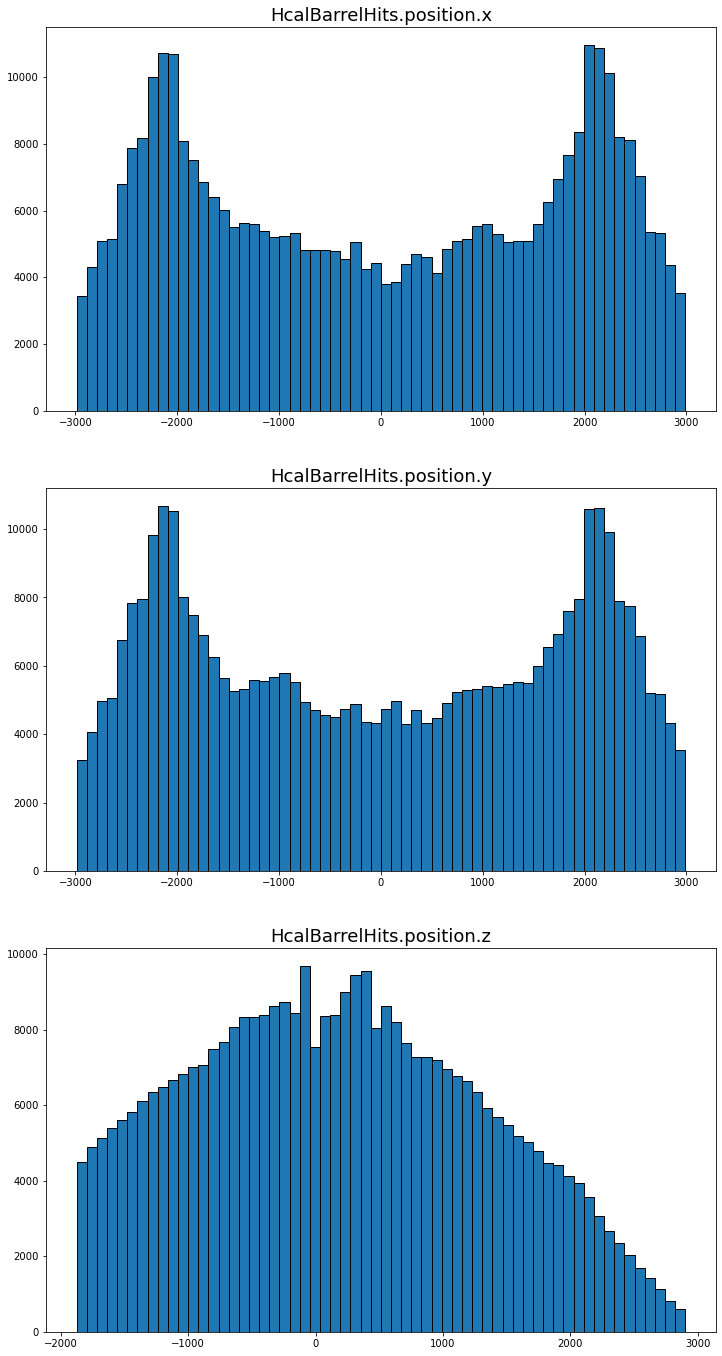

In [18]:
plt.figure(figsize=(12,24))
plt.subplot(311)
plt.hist(xpos2,bins=60,histtype='bar',edgecolor='black'); # put ; or plt.show() to suppress value outputs.
plt.title("HcalBarrelHits.position.x",fontsize=18)
plt.subplot(312)
plt.hist(ypos2,bins=60,histtype='bar',edgecolor='black'); 
plt.title("HcalBarrelHits.position.y",fontsize=18)
plt.subplot(313)
plt.hist(zpos2,bins=60,histtype='bar',edgecolor='black'); 
plt.title("HcalBarrelHits.position.z",fontsize=18);

In [19]:
diffx2 = xpos2 - truex2  # determines the level of segmentation we should use
diffy2 = ypos2 - truey2
diffz2 = zpos2 - truez2

print("Difference in hit x position and true position (in mm): ", diffx2)
print("Difference in hit y position and true position (in mm): ", diffy2)
print("Difference in hit z position and true position (in mm): ", diffz2)

Difference in hit x position and true position (in mm):  [0.148, 0.832, 1.54, 2.27, -2.08, -1.51, ... 1.8, -2.16, 1.92, -0.853, 0.591, 0.397]
Difference in hit y position and true position (in mm):  [0.257, 1.44, 2.66, 3.92, -3.6, -2.62, ... -3.12, 3.74, -3.33, 1.48, -1.02, -0.687]
Difference in hit z position and true position (in mm):  [-1.99, 0.128, 2.28, 4.54, -3.33, -1.11, ... -4.6, 0.0261, 3.77, -1.05, -4.67, 2.36]


In [20]:
radiusHit2 = np.sqrt(xpos2**2+ypos2**2)
phiHit2 = np.arctan2(ypos2, xpos2)

trueHit2 = np.sqrt(truex2**2+truey2**2)
phiTrue2 = np.arctan2(truey2, truex2)

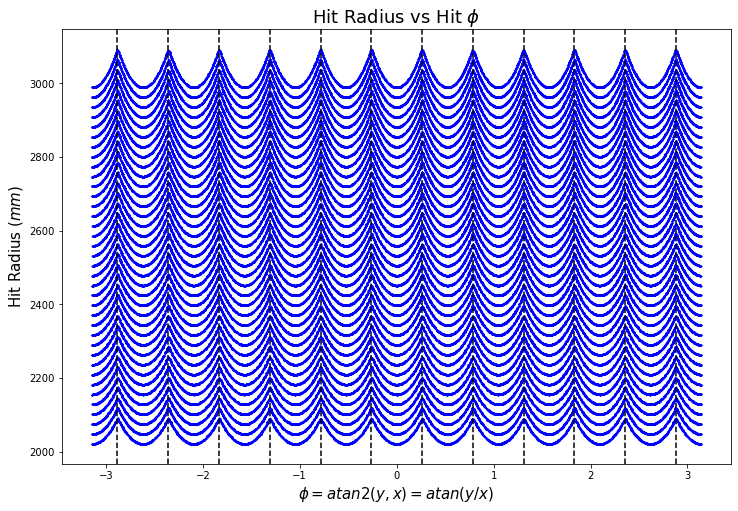

In [21]:
#peaks = [-2.8829,-2.3566,-1.8328,-1.3096,-0.7852,-0.2614,0.2618,0.7838,1.3088,1.8314,2.3558,2.8803]

plt.figure(figsize=(12,8))
plt.plot(phiHit2, radiusHit2, "b.", markersize=1.5)
plt.xlabel("$\phi = atan2(y,x) = atan(y/x)$",fontsize=15)
plt.ylabel("Hit Radius ($mm$)", fontsize=15)
plt.title("Hit Radius vs Hit $\phi$",fontsize=18)

for i in range(len(peaks)):
    plt.axvline(x=peaks[i],color="k",linestyle="--")

(-0.3, 0.3)

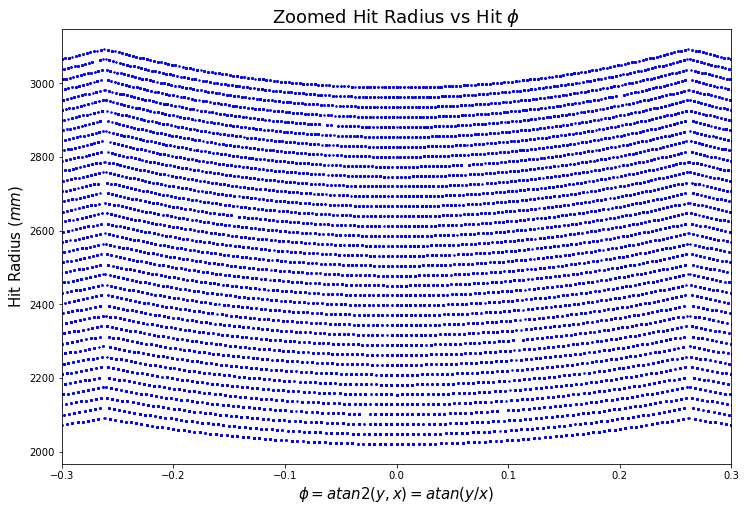

In [22]:
plt.figure(figsize=(12,8))
plt.plot(phiHit2, radiusHit2, "bo", markersize=1.5)
plt.xlabel("$\phi = atan2(y,x) = atan(y/x)$",fontsize=15)
plt.ylabel("Hit Radius ($mm$)", fontsize=15)
plt.title("Zoomed Hit Radius vs Hit $\phi$",fontsize=18)
plt.xlim(-0.3,0.3)

In [23]:
radiusHit, radiusHit2

(<Array [2.08e+03, 2.11e+03, ... 2.96e+03] type='197036 * float64'>,
 <Array [2.08e+03, 2.11e+03, ... 2.3e+03] type='363623 * float64'>)

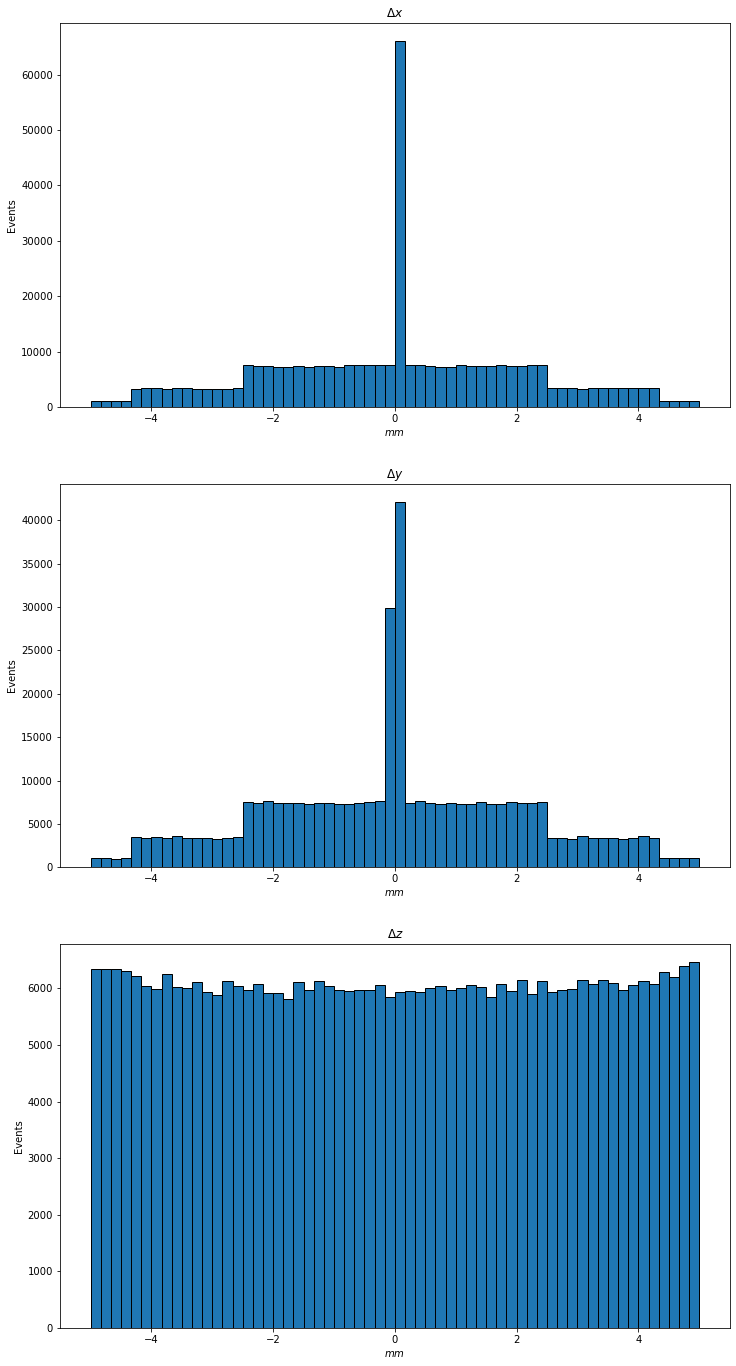

In [24]:
plt.figure(figsize=(12,24))
plt.subplot(311)
plt.hist(diffx2,bins=60,histtype='bar',edgecolor='black');
plt.title("$\Delta x$")
plt.xlabel("$mm$")
plt.ylabel("Events")
plt.subplot(312)
plt.hist(diffy2,bins=60,histtype='bar',edgecolor='black'); 
plt.title("$\Delta y$")
plt.xlabel("$mm$")
plt.ylabel("Events")
plt.subplot(313)
plt.hist(diffz2,bins=60,histtype='bar',edgecolor='black'); 
plt.title("$\Delta z$")
plt.xlabel("$mm$")
plt.ylabel("Events");
plt.savefig("events2.png")